In [75]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

from torchsummary import summary

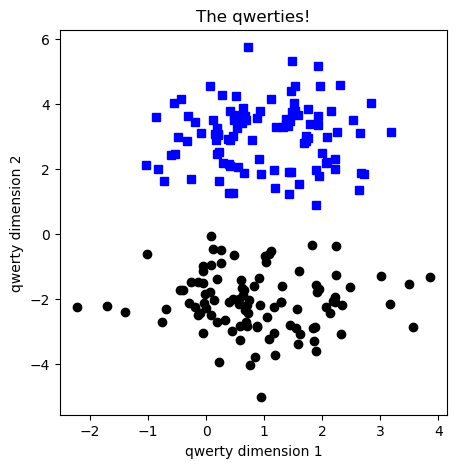

In [ ]:
# create data

nPerClust = 100
blur = 1

A = [1, 3]
B = [1, -2]

# generate data
a = [A[0] + np.random.randn(nPerClust) * blur, A[1] + np.random.randn(nPerClust) * blur]
b = [B[0] + np.random.randn(nPerClust) * blur, B[1] + np.random.randn(nPerClust) * blur]

# true labels
labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

# concatanate into a matrix
data_np = np.hstack((a, b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5, 5))
plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels == 0)[0], 1], "bs")
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels == 1)[0], 1], "ko")
plt.title("The qwerties!")
plt.xlabel("qwerty dimension 1")
plt.ylabel("qwerty dimension 2")
plt.show()

# Functions to build and train the model


In [ ]:
def createANNmodel(learningRate):

    # model architecture
    ANNclassify = nn.Sequential(
        nn.Linear(2, 16),  # input layer
        nn.ReLU(),  # activation unit
        nn.Linear(16, 1),  # hidden layer
        nn.ReLU(),  # activation unit
        nn.Linear(1, 1),  # output unit
        nn.Sigmoid(),  # final activation unit
    )

    # loss function
    lossfun = nn.BCELoss()  # but better to use BCEWithLogitsLoss

    # optimizer
    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

    # model output
    return ANNclassify, lossfun, optimizer


# Create class of the model
class ANNModelClass(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.ModuleDict()

        ## Input Layer
        self.layers["input"] = nn.Linear(2, 16)
        # Hidden Layer
        self.layers["hidden0"] = nn.Linear(16, 1)
        # Output Layer
        self.layers["output"] = nn.Linear(1, 1)

    # forward Pass
    def forward(self, x):
        x = F.relu(self.layers["input"](x))
        x = F.relu(self.layers["hidden0"](x))
        x = self.layers["output"](x)
        return x


# create everything
# ANNclassify, lossfun, optimizer = createANNmodel(0.01)

ANNModel = ANNModelClass()
# Model Summery
summary(ANNModel)

Layer (type:depth-idx)                   Param #
├─ModuleDict: 1-1                        --
|    └─Linear: 2-1                       48
|    └─Linear: 2-2                       17
|    └─Linear: 2-3                       2
Total params: 67
Trainable params: 67
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─ModuleDict: 1-1                        --
|    └─Linear: 2-1                       48
|    └─Linear: 2-2                       17
|    └─Linear: 2-3                       2
Total params: 67
Trainable params: 67
Non-trainable params: 0

In [ ]:
# a function that trains the model

# a fixed parameter
numepochs = 30000


def trainTheModel(ANNmodel):
    # Loss function and optimizer
    lossfun = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(ANNModel.parameters(), lr=0.01)
    # initialize losses
    losses = torch.zeros(numepochs)

    # loop over epochs
    for epochi in range(numepochs):

        # forward pass
        yHat = ANNmodel(data)

        # compute loss
        loss = lossfun(yHat, labels)
        losses[epochi] = loss

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # final forward pass
    predictions = ANNmodel(data)

    # compute the predictions and report accuracy
    # NOTE: Wasn't this ">0" previously?!?!
    totalacc = 100 * torch.mean(((predictions > 0.5) == labels).float())

    return losses, predictions, totalacc

# Test the new code by running it once


Final accuracy: 100%


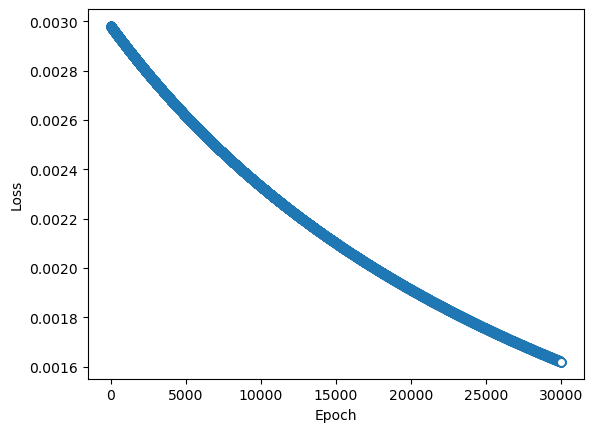

In [ ]:
# # create everything
# ANNclassify,lossfun,optimizer = createANNmodel(.01)

# run it
losses, predictions, totalacc = trainTheModel(ANNModel)

# report accuracy
print("Final accuracy: %g%%" % totalacc)


# show the losses
plt.plot(losses.detach(), "o", markerfacecolor="w", linewidth=0.1)
plt.xlabel("Epoch"), plt.ylabel("Loss")
plt.show()